In [1]:
import os   #These two are useful modules
import sys

import numpy as np #Numerical Python

In [2]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"Data")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /home/jovyan/work/grlmrc/PLS/Code
Main directory is /home/jovyan/work/grlmrc/PLS
data dir is /home/jovyan/work/grlmrc/PLS/Data


### READS FILE FROM dati.tsv
Theese are the datas from Univerity: 1992 students

In [20]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "dati.tsv"
data_file = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
lines = data_file.readlines()
#we can create an output list with only the lines that we want
out_list=[]
#we can create an output list with only the lines that we want
out_list=[]
for li in range(len(lines)):
    line = lines[li].strip("\n")
    out_list.append(line)
header="COD_FIS,GENERE,PROV_RES_ATTUALE,COM_RES_ATTUALE,RES_PREC_SIGLA,RES_PREC_DES,DIPARTIMENTO,TIPO_CORSO_COD,TIPO_CORSO_DES,CDS_ID,CDS_COD,AA_IMM1,TIPO_TITOLO_SUP_DESC,TIPO_TITOLO_STRA_DESC,SCUOLA_DESC,COMUNE_SCUOLA_DESC,PROVINCIA_SCUOLA_SIGLA,VOTO_MATURITA,VOTO_MIN,VOTO_MAX,STA_STU_COD,STATO_STU_DESC,MOT_STASTU_COD,MOTIVO_STATO_STU_DESC,CDS_PROV,AA_ARRIVO_FISL,CDS_ARR,AA_PARTENZA_FISL,CDS_COD_L,CDS_DESC_L,VOTO_FINALE,LODE_FLG,ANNO_CT,DATA_CT,AA_ID,COD,DES,VOTO,LODE_FLG_1,CREDITI,DATA_SUP,AA_SUP_ID,RIC_ID,STA_SCE_COD,PRESIDENTE_COMMISSIONE"
column_names = header.split(",")

#create and init a dictionary of lists..
data_dict={}
for ci in range(len(column_names)):
    data_dict[column_names[ci]]=[]
    
#we start from 1 since we want to skip the first line containing the headers.
for ri in range(0,len(out_list)-1):
    if ri >=13496: data_line = out_list[ri+1].split("\t")
    else: data_line = out_list[ri].split("\t")
    if(ri==len(out_list)-2): print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])
        
header_stud ="COD_FIS,GENERE,AA_IMM1,TIPO_TITOLO_SUP_DESC,PROVINCIA_SCUOLA_SIGLA,VOTO_MATURITA,VOTO_MIN,VOTO_MAX,STATO_STU_DESC,MOTIVO_STATO_STU_DESC,CDS_PROV,AA_ARRIVO_FISL,CDS_ARR,AA_PARTENZA_FISL,CDS_DESC_L,VOTO_FINALE,LODE_FLG,AA_ID"
colonne = header_stud.split(",")
studente={}
studente['MEDIA_VOTO']=[]
for ci in range(len(colonne)):
    studente[colonne[ci]]=[]
print("header contains %d columns" % len(colonne))
print(colonne)    

count=0
vuoti=0
#inizializza la sintesi dei dati imponendo che il numero della riga sia minore del numero totale di righe
while (count < 18936):
#Esiste un voto associato alla riga? Se sì: proseguo con l'analisi. Se no: passo alla riga successiva
    if(data_dict['VOTO'][count]):
#associo al valore 'temp' il rodotto del voto associato alla riga con i crediti associati alla riga
        crediti=int(data_dict['CREDITI'][count])
        temp=int(data_dict['VOTO'][count])*crediti
#inizializzo il contatore di ripetizioni per codice fiscale
        ro=1
#finchè il codice fiscale della riga è uguale a quello delle successive sommo i valori di 'temp' per ciascuna riga successiva ed i valori dei crediti totali
        while (data_dict["COD_FIS"][count]==data_dict["COD_FIS"][count+ro]):
#Esegue solo se esiste un valore di voto associato a ciascuna delle righe successive
            if(data_dict['VOTO'][count+ro]):
                temp=temp+(int(data_dict['VOTO'][count+ro])*int(data_dict['CREDITI'][count+ro]))
                crediti=crediti+int(data_dict['CREDITI'][count+ro])
            ro=ro+1
#Associo i valori del nuovo dizionario studente
        for ci in range(len(colonne)):
            studente[colonne[ci]].append(data_dict[colonne[ci]][count])
        studente['MEDIA_VOTO'].append(int(temp/crediti))
#stabilisco la nuova riga di partenza come quella per la quale non è più vero che si ripete lo stesso codice fiscale
        count=count+ro
    else:
#prima di passare alla riga successiva aggiungo una unità al numero di studenti che non hanno voti associati, se non, al massimo, una ideoneità linguistica
        if(count < 18935):
#considero i casi di idoneità linguistica ed evito che gli studenti vengano contati due volte
            if(data_dict["COD_FIS"][count]!=data_dict["COD_FIS"][count+1]): 
                vuoti=vuoti+1
                for ci in range(len(colonne)):
                    studente[colonne[ci]].append(data_dict[colonne[ci]][count])
                studente['MEDIA_VOTO'].append(int(temp/crediti))
        count=count+1

Processing row 18935
header contains 18 columns
['COD_FIS', 'GENERE', 'AA_IMM1', 'TIPO_TITOLO_SUP_DESC', 'PROVINCIA_SCUOLA_SIGLA', 'VOTO_MATURITA', 'VOTO_MIN', 'VOTO_MAX', 'STATO_STU_DESC', 'MOTIVO_STATO_STU_DESC', 'CDS_PROV', 'AA_ARRIVO_FISL', 'CDS_ARR', 'AA_PARTENZA_FISL', 'CDS_DESC_L', 'VOTO_FINALE', 'LODE_FLG', 'AA_ID']


In [22]:
#define the filename, in this case is in the hw-data/hw01-data directory
data_filename = "dati_ordinati_ridotti_CISIA_AI04_Scienze.txt"
data_file = open(os.path.join(data_dir,data_filename),"r")  #r means reading mode

#the readlines function gives a list with a line each
lines = data_file.readlines()

#we can create an output list with only the lines that we want
out_list=[]

for li in range(len(lines)):
    line = lines[li].strip("\n")
    if (len(line)>0):
        if (line[0]!="#"):
            #print(line)
            out_list.append(line)
            
header = out_list[0]

# We can ue the split function to split a long string. 
# Here we use the comma as separator, but one can use also other characters
column_names = header.split("; ")
print("header contains %d columns" % len(column_names))
print(column_names)

studente_cisia={}
for ci in range(len(column_names)):
    studente_cisia[column_names[ci]]=[]


#we start from 1 since we want to skip the first line containing the headers.
for ri in range(1,len(out_list)):
    data_line = out_list[ri].split("; ")
    if(ri==len(out_list)-1): print("Processing row %d" % ri)
    for ci in range(len(column_names)):
        studente_cisia[column_names[ci]].append(data_line[ci])

header contains 8 columns
['Codice fiscale', 'Tentativo', 'Data', 'Sede', 'Punteggio', 'Risposte corrette', 'Risposte errate', 'Risposte Nulle']
Processing row 455


(array([ 45.,  78.,  88., 207., 317., 450., 199., 194., 177., 237.]),
 array([18. , 19.2, 20.4, 21.6, 22.8, 24. , 25.2, 26.4, 27.6, 28.8, 30. ]),
 <BarContainer object of 10 artists>)

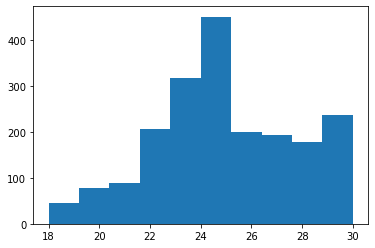

In [24]:
import matplotlib.pyplot as plt
plt.hist(studente["MEDIA_VOTO"])

In [30]:
#conta le corrispondenze tra codici fiscali cisia e dipartimento
cor=0
for ri in range(len(studente['COD_FIS'])):
    for li in range(len(studente_cisia['Codice fiscale'])):
        if(studente_cisia['Codice fiscale'][li]==studente['COD_FIS'][ri]): 
            cor=cor+1
            print(studente_cisia['Codice fiscale'][li], li, studente['COD_FIS'][ri], ri)
print(cor)

RSSNGL99T11G273R 270 RSSNGL99T11G273R 3
PLLGLL00T20G273E 166 PLLGLL00T20G273E 4
MZZMTT00P19A089L 172 MZZMTT00P19A089L 5
CCCLNE99T68I156O 416 CCCLNE99T68I156O 18
PRNGRL00B10G157S 384 PRNGRL00B10G157S 19
RSSGRG99M42I537A 363 RSSGRG99M42I537A 23
PTTDVD99H14A326D 243 PTTDVD99H14A326D 24
PLLMRC99C09A326Q 220 PLLMRC99C09A326Q 25
GRRFPP99A12A326U 353 GRRFPP99A12A326U 26
MNSLNZ00E09A515B 280 MNSLNZ00E09A515B 44
LBRGLI99M26G878R 355 LBRGLI99M26G878R 45
MNCFNC99H17A390P 364 MNCFNC99H17A390P 55
CNTGLI00H19A390D 30 CNTGLI00H19A390D 56
BRBSFN00A28L407R 181 BRBSFN00A28L407R 57
RNZFNC01A31F656N 26 RNZFNC01A31F656N 58
CNLLSN00L03D869P 28 CNLLSN00L03D869P 59
MRNTMS00L30F656D 58 MRNTMS00L30F656D 60
CSCFNC00T20A390M 12 CSCFNC00T20A390M 61
LPPVVN01A45H096O 95 LPPVVN01A45H096O 93
CLDGPP00E16L109B 99 CLDGPP00E16L109B 94
DSTSFN01C02L109X 50 DSTSFN01C02L109X 95
TFLFNC00M05A662E 161 TFLFNC00M05A662E 96
CPNTSM00D69I330H 0 CPNTSM00D69I330H 97
CPNTSM00D69I330H 1 CPNTSM00D69I330H 97
DPNLSS00H44A794T 66 DPNLSS00H44

In [114]:
#Conta il numero di studenti che si contano più di una volta nei dati dipartimento, dice quali sono le righe ed il numero di voltein cui compare
cont=0
codici=[]
riga=[]
for ri in range(len(studente['COD_FIS'])):
    for li in range(len(studente['COD_FIS'])):
        if(li<ri):
            if(studente['COD_FIS'][li]==studente['COD_FIS'][ri]):
                codici.append(studente['COD_FIS'][li])
                riga.append(li)
                #print(ri,li,studente['COD_FIS'][li])
                cont=cont+1
            #print(studente_cisia['Codice fiscale'][li], li, studente['COD_FIS'][ri], ri)
#print(cont)
volte=[]
for n in range(len(codici)):
       volte.append(codici.count(codici[n]))
        
due_volte=volte.count(1)
tre_volte=int(volte.count(3)/3)
quattro_volte=int(volte.count(6)/6)
cinque_volte=int(volte.count(10)/10)

print(due_volte, 'studenti si presentano due volte alle righe:')
for n in range(len(codici)):
       if volte[n]==1: print(codici[n],riga[n])
            
print('\n \n',tre_volte, 'studenti si presentano tre volte alle righe:')
for n in range(len(codici)):
       if volte[n]==3: print(codici[n],riga[n])
            
print('\n \n',quattro_volte, 'studenti si presentano tre volte alle righe:')
for n in range(len(codici)):
       if volte[n]==6: print(codici[n],riga[n])

print('\n \n',cinque_volte, 'studenti si presentano tre volte alle righe:')
for n in range(len(codici)):
       if volte[n]==10: print(codici[n],riga[n])

64 studenti si presentano due volte alle righe:
DHRSPH96H51A326T 22
DLZDNL96C19H769Y 33
RCCLSN96M12A271K 34
STTNDR97H17I155P 52
GLLVNT95C51A509E 115
FLLDDP96E04B180E 139
MNSNRC93H29A669Q 154
BGNLRS93M06D205L 218
MRNDNN00D57Z604O 254
RSSDRN96T61E885X 308
GNTFTH98P07D403G 365
CNTLPA99L24D612L 372
MNTLCR00A28Z611M 375
FRSCLD94S17F205Z 391
LMAMNL97B10F032A 447
BRTDRD95M25G088I 454
BRTRSS90H41G912X 519
SLDFNC94B26A657G 692
RLAGPP96H30E715X 746
LRAMTN96T61G628U 753
SNNSLV96H68G628R 740
SNTKVN94T30C236K 795
BRRMNG91L02C236P 670
MNDFNC99B07G478X 811
CRRGCM97R13G491R 778
SBBMTT98H09G478K 849
FRNVLR94A31E388D 841
TSTFBA93R02Z131M 920
NCDLTR89A71B832F 923
VNCMCH97P55G628N 948
MLNSMN94D16B832S 930
MNFMRC95T24F023C 935
SLVPPL96S18F935H 1113
FNLTRS99A68A475E 1123
LMALNZ95B56B157M 1284
MLLKVN93C28G491K 1280
LNODNL97A28G702K 1290
RRGFNC98R02I046H 1340
BNSJPB97P16Z514D 1337
GNNLNZ98P07E625F 1315
GHLFNC98R13I046W 1318
NNLLEI99B13I046B 1363
DMTRRT93E02G793Y 1211
BRRCPI99D03G702G 1349
VNDDVD95B17Z149K 141

In [98]:
#Analisi dello stato degli studenti
att=0
cess=0
sosp=0
for ri in range(len(studente['COD_FIS'])):
    if(studente['STATO_STU_DESC'][ri]=='Attivo'): att=att+1
    if(studente['STATO_STU_DESC'][ri]=='Cessato'): cess=cess+1
    if(studente['STATO_STU_DESC'][ri]=='Sospeso'): sosp=sosp+1
    if(studente['STATO_STU_DESC'][ri]!='Attivo'):
        if(studente['STATO_STU_DESC'][ri]!='Cessato'):
            if(studente['STATO_STU_DESC'][ri]!='Sospeso'): print('riga anomalo:',studente['STATO_STU_DESC'][ri],ri)
            
print('\n Attivi',att,'\n cessati',cess,'\nsospesi',sosp,'\n somma', att+cess+sosp,'\n totale atteso',len(studente['COD_FIS']))

riga anomalo:  1975

 Attivi 801 
 cessati 1147 
sospesi 43 
 somma 1991 
 totale atteso 1992


In [83]:
imm=0
cons=0
rin=0
tr_usc=0
dec=0
altro=0
for ri in range(len(studente['COD_FIS'])):
    if(studente['MOTIVO_STATO_STU_DESC'][ri]=='Immatricolazione'): imm=imm+1
    if(studente['MOTIVO_STATO_STU_DESC'][ri]=='Conseguimento titolo'): cons=cons+1
    if(studente['MOTIVO_STATO_STU_DESC'][ri]=='Rinuncia'): rin=rin+1
    if(studente['MOTIVO_STATO_STU_DESC'][ri]=='Trasferimento in uscita'): tr_usc=tr_usc+1
    if(studente['MOTIVO_STATO_STU_DESC'][ri]=='Decadenza'): dec=dec+1
    if(studente['MOTIVO_STATO_STU_DESC'][ri]!='Decadenza'):
        if(studente['MOTIVO_STATO_STU_DESC'][ri]!='Trasferimento in uscita'):
            if(studente['MOTIVO_STATO_STU_DESC'][ri]!='Immatricolazione'):
                if(studente['MOTIVO_STATO_STU_DESC'][ri]!='Rinuncia'):
                    if(studente['MOTIVO_STATO_STU_DESC'][ri]!='Conseguimento titolo'): altro=altro+1
print('immatricolati=',imm,'\n Conseguimento titolo=',cons,'\n Rinuncia=',rin,'\n Decadenza=',dec,'\n Tresferimenti in uscita=',tr_usc,'\n altro=',altro,'\n somma',imm+cons+rin+tr_usc+dec+altro,'\n dovrebbero essere',len(studente['COD_FIS']))

immatricolati= 774 
 Conseguimento titolo= 689 
 Rinuncia= 352 
 Decadenza= 94 
 Tresferimenti in uscita= 41 
 altro= 42 
 somma 1992 
 dovrebbero essere 1992


In [101]:
#Scrive i motivi per cui lo studente è Attivo, Cessato o Sospeso e la riga associata allo studente
a='Attivo'
c='Cessato'
s='Sospeso'
analizzo_gli=s

for ri in range(len(studente['COD_FIS'])):
    if(studente['STATO_STU_DESC'][ri]==analizzo_gli): print(studente['MOTIVO_STATO_STU_DESC'][ri], ri)
        #if(studente['MOTIVO_STATO_STU_DESC'][ri]=='Conseguimento titolo'):

Trasferimento in uscita 27
Trasferimento in uscita 62
Trasferimento in uscita 76
Trasferimento in uscita 78
Trasferimento in uscita 80
Trasferimento in uscita 176
Trasferimento in uscita 203
Trasferimento in uscita 275
Trasferimento in uscita 277
Servizio Civile 288
Trasferimento in uscita 292
Trasferimento in uscita 330
Trasferimento in uscita 344
Trasferimento in uscita 358
Trasferimento in uscita 374
Trasferimento in uscita 427
Trasferimento in uscita 476
Trasferimento in uscita 487
Trasferimento in uscita 491
Trasferimento in uscita 497
Trasferimento in uscita 601
Trasferimento in uscita 720
Trasferimento in uscita 843
Trasferimento in uscita 860
Trasferimento in uscita 863
Trasferimento in uscita 874
Trasferimento in uscita 882
Trasferimento in uscita 889
Trasferimento in uscita 903
Trasferimento in uscita 1052
Trasferimento in uscita 1070
Trasferimento in uscita 1225
Trasferimento in uscita 1239
Gravi motivi familiari 1356
Trasferimento in uscita 1430
Trasferimento in uscita 1431

In [63]:
#lettore di riga
riga=1975
for ci in range(len(colonne)):
    print(studente[colonne[ci]][riga])

In [64]:
print(studente['MOTIVO_STATO_STU_DESC'])

['Immatricolazione', 'Immatricolazione', 'Chiusura imm. per inadempimenti amm.vi', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Rinuncia', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Rinuncia', 'Conseguimento titolo', 'Rinuncia', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Trasferimento in uscita', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Conseguimento titolo', 'Immatricolazione', 'Rinuncia', 'Decadenza', 'Immatricolazione', 'Conseguimento titolo', 'Rinuncia', 'Rinuncia', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Rinuncia', 'Immatricolazione', 'Immatricolazione', 'Immatricolazione', 'Conseguimento titolo', 'Conseguimento titolo', 'Consegui